In [36]:
import pandas as pd
import os
import urllib.request
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
path = r"C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC"
os.chdir(path)
figpath = r"C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\mclave"
csv = r"C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\tempfiles\dailyprecip.csv"
arkEastValley = 'hly01,hly02,lam01,lam03,lam04,mcl01'  
today = datetime.now().strftime("%Y-%m-%d")


In [55]:
f = open(csv, "w+")
urllib.request.urlretrieve(
        'http://coagmet.colostate.edu/cgi-bin/web_services.pl?type=daily&sids=' + arkEastValley + '&sdate=2016-10-01&edate=2017-09-30&elems=pp', 
        filename= csv)
df = pd.read_csv(csv)
f.close()
df = df.reset_index()

In [56]:
df.columns.values[0] = 'Station'
df.columns.values[1] = 'Date'
df.columns.values[2] = 'Precip'

In [57]:
df['Date'] = pd.to_datetime(df.Date)
df['julian'] = df.Date.dt.strftime('%j')
df['PrecipAccum'] = df.groupby('Station')['Precip'].cumsum()
df

,Station,Date,Precip,julian,PrecipAccum
0,hly01,2016-10-01,0.000,275,0.000
1,hly01,2016-10-02,0.000,276,0.000
2,hly01,2016-10-03,0.000,277,0.000
3,hly01,2016-10-04,0.000,278,0.000
4,hly01,2016-10-05,0.000,279,0.000
5,hly01,2016-10-06,0.000,280,0.000
6,hly01,2016-10-07,0.000,281,0.000
7,hly01,2016-10-08,0.000,282,0.000
8,hly01,2016-10-09,0.000,283,0.000
9,hly01,2016-10-10,0.000,284,0.000


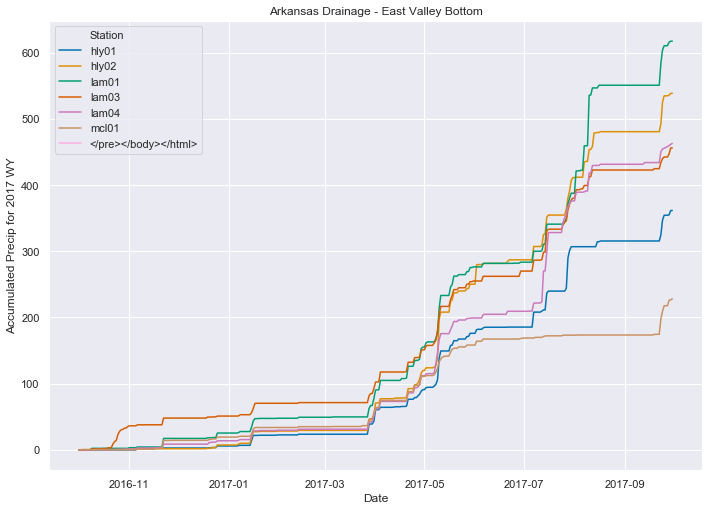

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(x='Date',y='PrecipAccum',hue='Station',data=df,palette='colorblind')
plot.set(xlabel='Date',ylabel='Accumulated Precip for 2017 WY')
title = str('Arkansas Drainage - East Valley Bottom')
plt.title(title)
plt.savefig(figpath + r'\arkEVB_2017WY.png')
plt.show()